In [56]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
import copy
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from xgboost import XGBRegressor

from sklearn.svm import SVR

from sklearn.decomposition import PCA


# Reading the data and extracting X and y

In [57]:
data = pd.read_csv('Final Dataset (Lattice thermal) - Anudeep working.csv')
data

Formula  temperature(K)  AGL Debye temperature acoustic (K)  \
0        Cu2Se             295                                 113   
1        CoSb3             323                                 123   
2        FeVSb             400                                 254   
3     Ca3AlSb3             422                                  88   
4    Ca5In2Sb6             422                                  77   
..         ...             ...                                 ...   
108     GePtSe             300                                 136   
109   La2O7Ti2             300                                 197   
110    Mg2O4Sn             300                                 220   
111        NbS             300                                 314   
112    O7Ti2Y2             300                                 234   

     AGL Debye temperature (K)  AGL Grüneisen parameter  \
0                          163                     2.34   
1                          310                     2.33   
2                          366                     2.20   
3                          267                     1.94   
4                          227                     2.01   
..                         ...                      ...   
108                        311                     2.42   
109                        552                     2.03   
110                        531                     2.06   
111                        498                     2.15   
112                        657                     1.99   

     AEL Debye temperature (K)  \
0                          168   
1                          312   
2                          365   
3                          252   
4                          212   
..                         ...   
108                        309   
109                        549   
110                        526   
111                        492   
112                        651   

     AGL heat capacity constant pressure (300 K) (kB/cell)  \
0                                                 9.44       
1                                                47.30       
2                                                 8.58       
3                                                84.00       
4                                                79.20       
..                                                 ...       
108                                              35.30       
109                                              57.20       
110                                              37.20       
111                                              10.70       
112                                              53.50       

     AGL heat capacity constant volume (300 K) (kB/cell)  \
0                                                 8.88     
1                                                45.60     
2                                                 8.38     
3                                                80.90     
4                                                75.90     
..                                                 ...     
108                                              34.20     
109                                              56.10     
110                                              36.20     
111                                              10.50     
112                                              52.60     

     AGL thermal conductivity (300 K) (W m-1 K-1)  \
0                                           0.661   
1                                           2.600   
2                                           9.400   
3                                           1.280   
4                                           0.937   
..                                            ...   
108                                         2.960   
109                                         5.560   
110                                         4.640   
111                                        16.600   

In [58]:
columns_to_exclude = ['Formula', 'thermal_conductivity(W/mK)']
X = data.drop(columns=columns_to_exclude)
X

temperature(K)  AGL Debye temperature acoustic (K)  \
0               295                                 113   
1               323                                 123   
2               400                                 254   
3               422                                  88   
4               422                                  77   
..              ...                                 ...   
108             300                                 136   
109             300                                 197   
110             300                                 220   
111             300                                 314   
112             300                                 234   

     AGL Debye temperature (K)  AGL Grüneisen parameter  \
0                          163                     2.34   
1                          310                     2.33   
2                          366                     2.20   
3                          267                     1.94   
4                          227                     2.01   
..                         ...                      ...   
108                        311                     2.42   
109                        552                     2.03   
110                        531                     2.06   
111                        498                     2.15   
112                        657                     1.99   

     AEL Debye temperature (K)  \
0                          168   
1                          312   
2                          365   
3                          252   
4                          212   
..                         ...   
108                        309   
109                        549   
110                        526   
111                        492   
112                        651   

     AGL heat capacity constant pressure (300 K) (kB/cell)  \
0                                                 9.44       
1                                                47.30       
2                                                 8.58       
3                                                84.00       
4                                                79.20       
..                                                 ...       
108                                              35.30       
109                                              57.20       
110                                              37.20       
111                                              10.70       
112                                              53.50       

     AGL heat capacity constant volume (300 K) (kB/cell)  \
0                                                 8.88     
1                                                45.60     
2                                                 8.38     
3                                                80.90     
4                                                75.90     
..                                                 ...     
108                                              34.20     
109                                              56.10     
110                                              36.20     
111                                              10.50     
112                                              52.60     

     AGL thermal conductivity (300 K) (W m-1 K-1)  \
0                                           0.661   
1                                           2.600   
2                                           9.400   
3                                           1.280   
4                                           0.937   
..                                            ...   
108                                         2.960   
109                                         5.560   
110                                         4.640   
111                                        16.600   
112                                         7.520   

     AGL vibrational entropy atom (300 K) (meV/(K atom))  \
0              

In [59]:
y = data['thermal_conductivity(W/mK)']
y

0       2.32
1       6.90
2       8.26
3       0.99
4       0.87
       ...  
108     5.87
109    29.32
110    11.27
111     0.98
112    37.84
Name: thermal_conductivity(W/mK), Length: 113, dtype: float64

# RFE

# Normalization

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Standardize features
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [61]:
# Initialize Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=83)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print("RMSE:", rmse)
print("R2 Score:", r2)

Random Forest Regression:
RMSE: 16.799689201032987
R2 Score: -0.5190272710230286


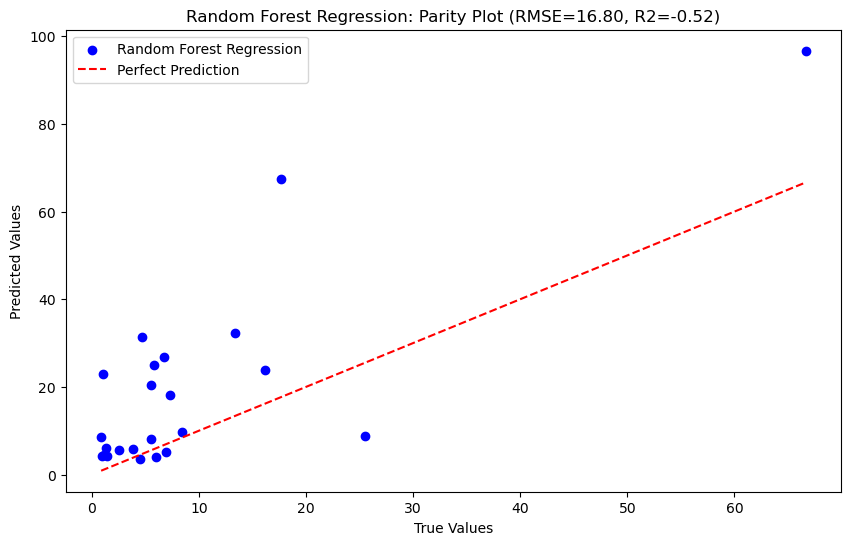

In [62]:
import matplotlib.pyplot as plt

def plot_parity(y_true, y_pred, model_name, rmse, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', label=f'{model_name}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{model_name}: Parity Plot (RMSE={rmse:.2f}, R2={r2:.2f})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot parity plot for Random Forest Regression
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test, y_pred)
plot_parity(y_test, y_pred, f'Random Forest Regression', rf_rmse, rf_r2)


# Regularization using Ridge and Lasso

In [64]:
# Ridge Regression
ridge = Ridge(alpha=0.00000001)  # You can adjust the regularization strength (alpha) as needed
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regression RMSE:", math.sqrt(ridge_mse))

# Lasso Regression
lasso = Lasso(alpha=0.00000001)  # You can adjust the regularization strength (alpha) as needed
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression RMSE:", math.sqrt(lasso_mse))


Ridge Regression RMSE: 26.84833300780069
Lasso Regression RMSE: 29.15997240113173


E:\Softwares\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+04, tolerance: 2.055e+01
  model = cd_fast.enet_coordinate_descent(


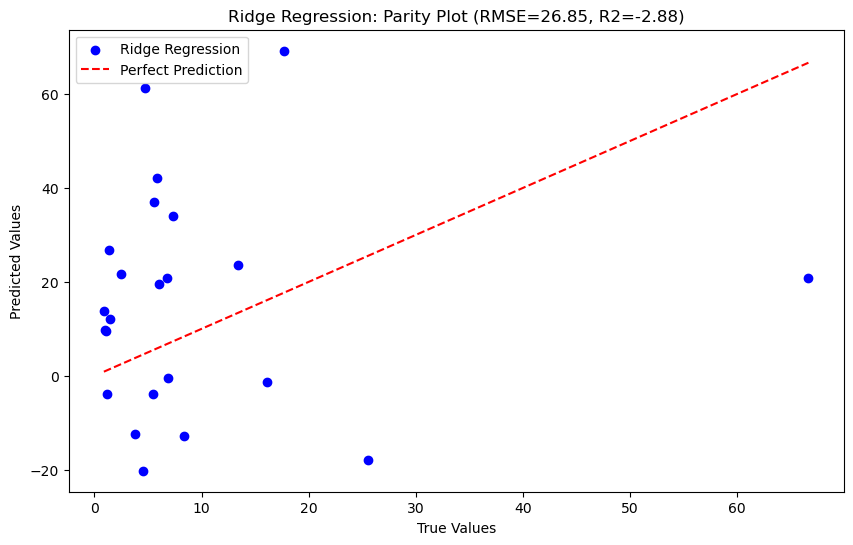

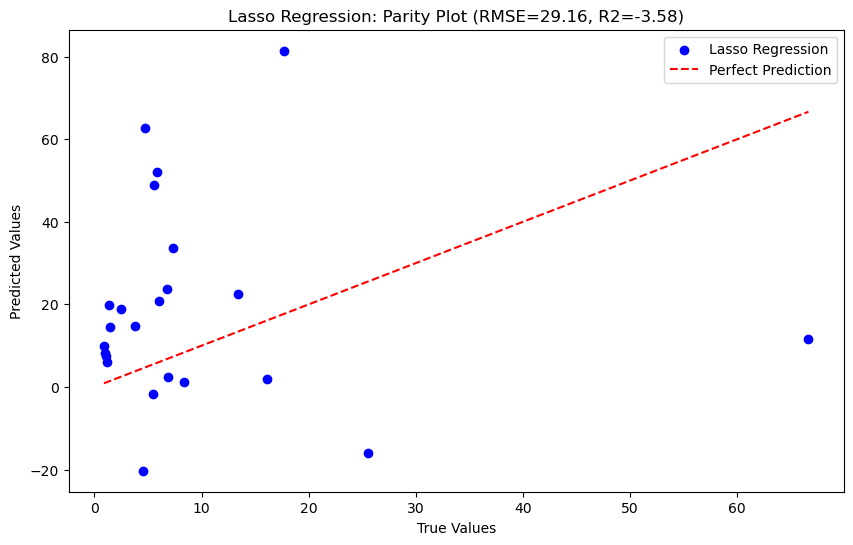

In [65]:
def plot_parity(y_true, y_pred, model_name, rmse, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', label=f'{model_name}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{model_name}: Parity Plot (RMSE={rmse:.2f}, R2={r2:.2f})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot parity plot for Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_pred)
plot_parity(y_test, ridge_pred, f'Ridge Regression', ridge_rmse, ridge_r2)

# Plot parity plot for Lasso Regression
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_pred)
plot_parity(y_test, lasso_pred, f'Lasso Regression', lasso_rmse, lasso_r2)


# XGBoost

In [67]:
# Initialize XGBoost regressor
xgb = XGBRegressor()

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 296.32059493542243
RMSE: 17.2139651136925
R2 Score: -0.5948686206238765


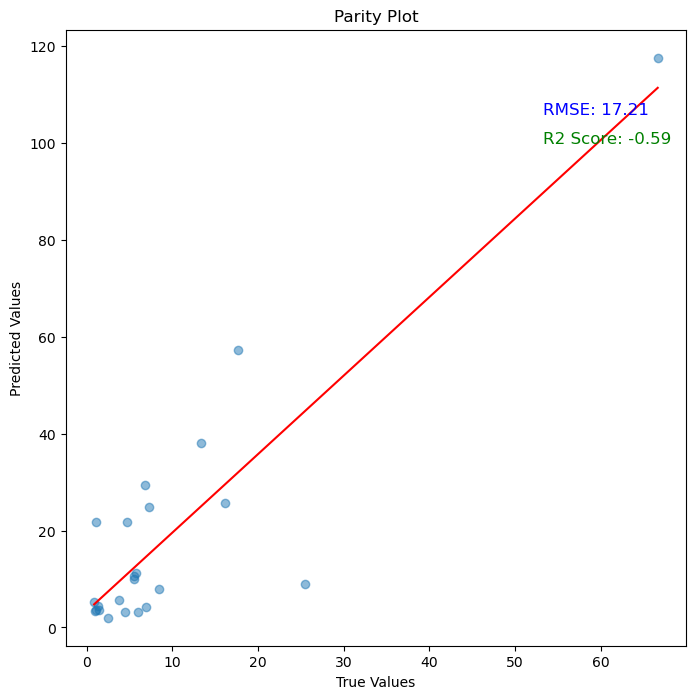

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Create parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot')

# Calculate RMSE and R2 score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Annotate RMSE and R2 score
plt.text(np.max(y_test) * 0.8, np.max(y_pred) * 0.9, f'RMSE: {rmse:.2f}', fontsize=12, color='blue')
plt.text(np.max(y_test) * 0.8, np.max(y_pred) * 0.85, f'R2 Score: {r2:.2f}', fontsize=12, color='green')

plt.show()


# Linear Regression

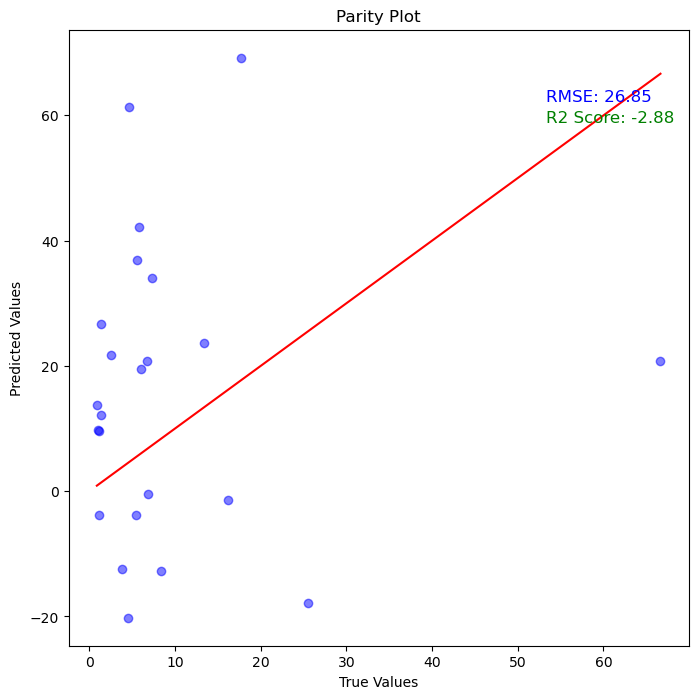

MSE: 720.8293064175757
RMSE: 26.848264495448785
R2 Score: -2.8796764763583327


In [72]:
import matplotlib.pyplot as plt

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 1:1 line
plt.title('Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.text(np.max(y_test) * 0.8, np.max(y_pred) * 0.9, f'RMSE: {rmse:.2f}', fontsize=12, color='blue')
plt.text(np.max(y_test) * 0.8, np.max(y_pred) * 0.85, f'R2 Score: {r2:.2f}', fontsize=12, color='green')
plt.show()

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


# To get optimal random state

# KNN model

In [70]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 148.8822326956522
RMSE: 12.201730725419742
R2 Score: 0.198680060876413


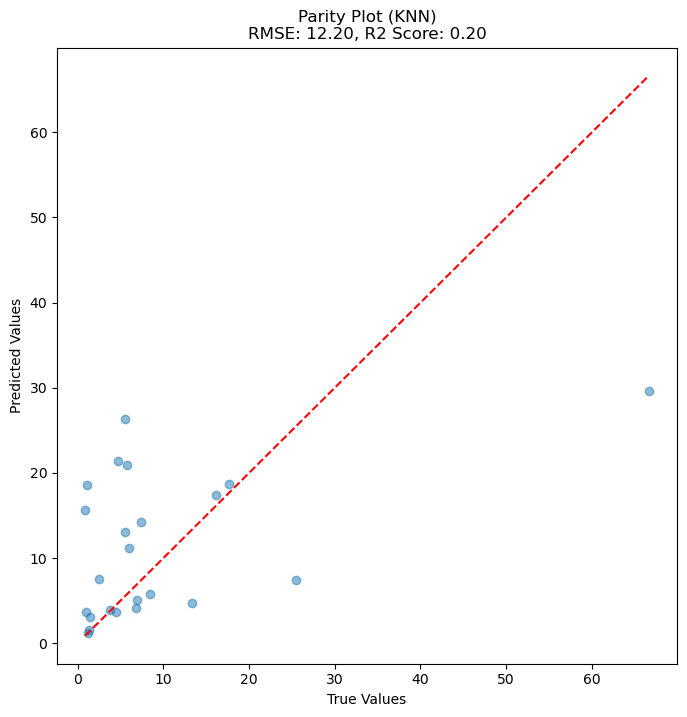

In [71]:
# Create parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot (KNN)\nRMSE: {:.2f}, R2 Score: {:.2f}'.format(rmse, r2))
plt.show()
